In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
import os, sys

In [20]:
mito_code = '/home/falcon/Development/unet-training/a-fully-supervised-unet/'
weights = os.path.join(mito_code, 'models/jain/weights.996-0.32-0.06-0.98.hdf5')

In [21]:
sys.path.append(mito_code)
import data_management
from data_management import load_stack
from data_management import load_data

import interactive_plot

import metrics
from metrics import statistics
from metrics import confusion_matrix
from metrics import error_distribution
from metrics import error_borders
from metrics import PR_curve

import generator_extended

import unet
from unet import load_model_unet
from unet import predict_net
from unet import get_unet
from unet import train
from unet import execute_predict

In [22]:
import mahotas as mh
from PIL import Image

In [23]:
img_dir = '/home/falcon/Thesis/test-img-newdata1/'
img1 = os.path.join(img_dir, 'mask0000.png')
img2 = os.path.join(img_dir, '0.png')

In [24]:
img_mask = mh.imread(img2)
# not cropping
# img_mask = img_mask[0:512, 0:512]

In [25]:
img = mh.imread(img1)
# not cropping
# img = img[0:512, 0:512]
# TODO maybe invert the image
img_inverted = 255 - img

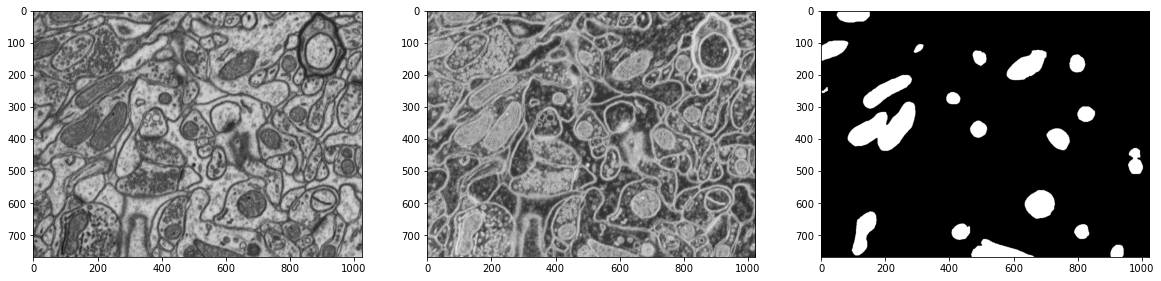

In [26]:
f, images_subplot = plt.subplots(1,3, figsize=(20, 20)) 
images_subplot[0].imshow(img, cmap='gray')
images_subplot[1].imshow(img_inverted, cmap='gray')
images_subplot[2].imshow(img_mask, cmap='gray')

In [27]:
# Normalize inverted image
img_inverted_normalized = img.astype(float)
img_inverted_normalized /= 255

In [28]:
# create copy of normalized image
img_copy = np.zeros((1, img.shape[0], img.shape[1], 1))
img_copy[0,:,:,0] = img_inverted_normalized[:,:]

In [29]:
# load model
model = load_model_unet(weights)

In [30]:
res = execute_predict(model, img_copy)

100%|██████████| 1/1 [00:00<00:00, 35.87it/s]


1/1 [==============================] - 0s 915us/step
1 of 8
1/1 [==============================] - 0s 535us/step
2 of 8
1/1 [==============================] - 0s 757us/step
3 of 8
1/1 [==============================] - 0s 558us/step
4 of 8
1/1 [==============================] - 0s 676us/step
5 of 8
1/1 [==============================] - 0s 526us/step
6 of 8
1/1 [==============================] - 0s 585us/step
7 of 8
1/1 [==============================] - 0s 546us/step
8 of 8


In [31]:
res[res>0.5]=1
res[res<=0.5]=0

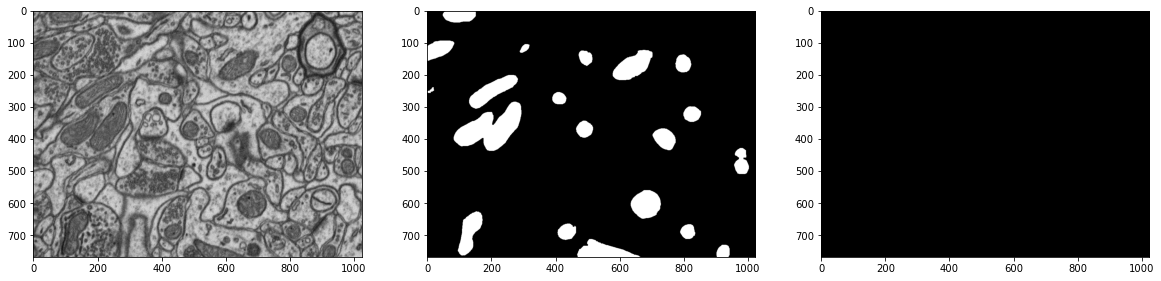

In [32]:
f, images_subplot = plt.subplots(1,3, figsize=(20, 20)) 
images_subplot[0].imshow(img, cmap='gray')
images_subplot[1].imshow(img_mask, cmap='gray')
images_subplot[2].imshow(res[0,:,:,0], cmap='gray')